***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 04/23}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

#### Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations of the different coverages:

$$r_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$r_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$r_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$r_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$




In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
MKM = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') 

Mass is conserved. 

CPU times: user 13.6 ms, sys: 2.32 ms, total: 15.9 ms
Wall time: 25 ms


In [7]:
MKM.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM.set_rxnconditions(Pr=[1e-8,1e-8,1e-8]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM.set_limits_of_integration(Ti=0,Tf=200);#Sets the reange of time used in integration

<IPython.core.display.Javascript object>


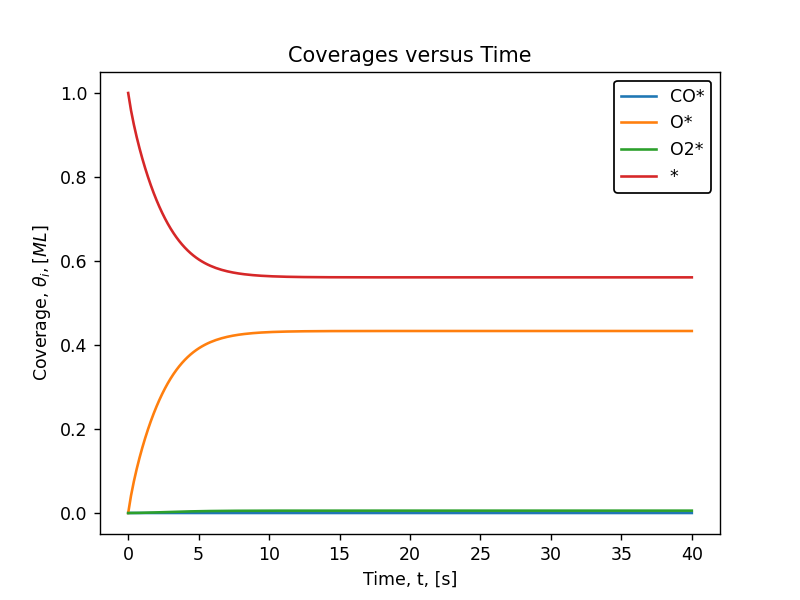

In [8]:
#Rate Constants
kval = np.array([7.79027001e+06, 2.76471157e+03, 9.33338097e+06, 6.22390802e+00,
 9.33374875e+05, 1.55909555e+04, 3.86227078e+04, 5.32781881e+06])
MKM.k = kval

sol,solt= MKM.solve_coverage(plot=True,Tf_eval=linspace(0,40,200)) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:

MKM.k = kval
MKM.get_X_RC_SS(p_inc=0.1,k_o_inp=kval,rxn=-1)

[0.9115477119651291,
 -0.06555755161730299,
 -7.490275175366009e-07,
 0.14038558553856628]

In [19]:
MKM.k

array([2.00e+00, 6.65e-09, 2.31e+02, 1.15e+05, 6.13e+08, 2.14e-02,
       2.85e-06, 5.00e+02])

In [21]:

val = MKM.get_X_RC_SS(p_inc=0.1,k_o_inp=kval,rxn=-1)
print(np.sum(val))

0.9863749968588748


In [16]:
MKM.k

array([2.00e+00, 6.65e-09, 2.31e+02, 1.15e+05, 6.13e+08, 2.14e-02,
       2.85e-06, 5.00e+02])

<IPython.core.display.Javascript object>


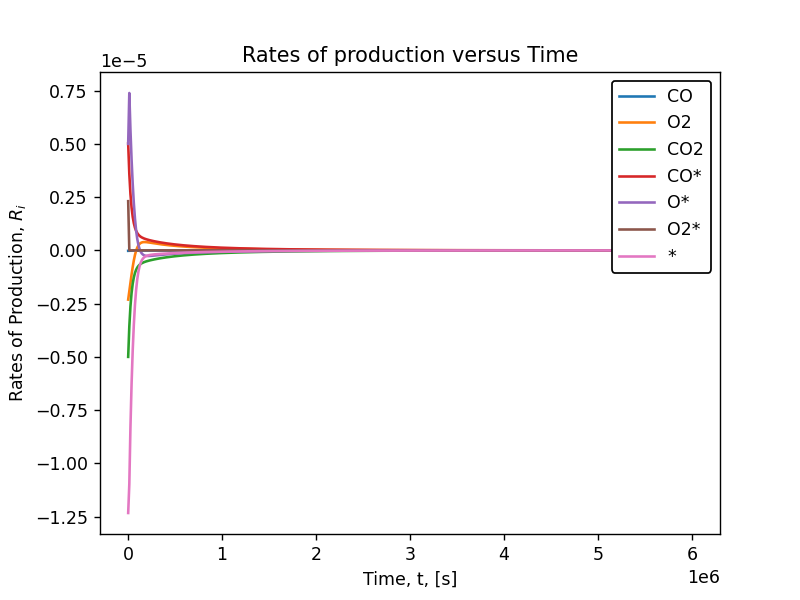

In [12]:
MKM.label='rates_p'
rsol,rsolt= MKM.solve_rate_production(plot=True,Tf_eval=linspace(0,tend,500))

<IPython.core.display.Javascript object>


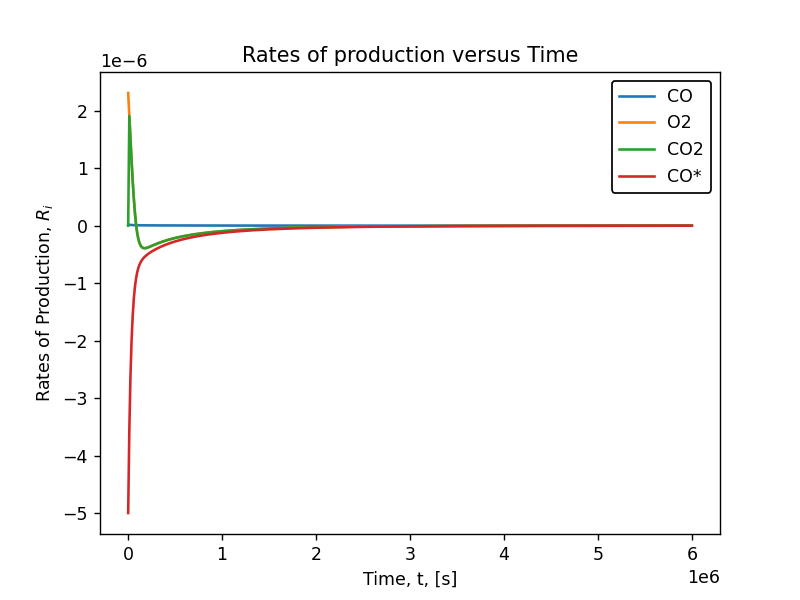

In [13]:
MKM.label='rates_r'
a = MKM.solve_rate_reaction(plot=True,Tf_eval=linspace(0,tend,500))

In [8]:
np.shape(a[0][1])

(4,)

In [9]:
np.shape(rsol[1])#ONLY coverages.

(7,)

In [10]:
len(rsolt)

200

In [11]:
# ### Calculating the instantaneous rates of profuction (i.e grad/sites)
# TOF_GS = np.empty([len(o.iloc[:,1])-1,len(Gspecies)]) #initializing an array of instantaneous TOFs for gaseous species
# # grads = np.empty([len(o.iloc[:,1])-1,1])
# for i in np.arange(len(Gspecies)):
#     grads = np.gradient(Gnmol[:,i],Gtime,edge_order=2)
#     TOF_GS[:,i] = grads/sites

### Degree of Rate Control
Original format:
$$X_{RC_i} = \left(\frac{d ln(r)}{d ln k_i}\right)_{k_{i\neq j},K_{i}} $$

Simplified:

$$X_{RC_i}=\frac{r_{new_i} - r_o}{p_{inc}*r_o} $$

Note:

$r_{new_i}$ : The rate of the designated reaction i of whose rate constants where increased by $p_{inc}$

$p_{inc}$ : Percent increase applied to the rate constants of the designated rate being studied. (All other rate constants for the other reactions remain unchanged)

$r_o$ : The rate of reaction of the step being compared against (Usually the production or synthesis step)

In [16]:
 def get_X_RC_TS(p_inc=0.1,k_o_inp=[],rxn=-1,j =1,no_points=100, e_time = 40):
    #p_inc is the percent increase of rate const. #k_o_inp, is the inputed rate constants to allow for their initial values to be user defined, #rxn is the reaction producing the products being investigated : -1 indicates the last elementary step
    if k_o_inp!=[]:
        k_o = k_o_inp
    else:
        k_o = np.array(MKM.kextract()) #From Param file

    Xrc = [] #Initializing the empty array of degrees of rate control
    MKM.k = np.array(k_o)
    rin = np.array(MKM.solve_rate_reaction(plot=False,Tf_eval=linspace(0,e_time,no_points))[0][j]) #[0] extracts sol and not time
    # enablePrint()
    # print('--initial SSrates')
    # print(rin)
    # print('\n')

    if rxn>len(rin) or rxn<(-len(rin)):
        raise Exception('An invalid rxn value has been entered')
    else:
        ro = rin[rxn] 

    for i in np.arange(len(rin)):
#         ro = rin[i]
        n = 2*i
        # print(i)
#         print('before:')
#         print(k_o)
        kfwd = k_o[n]*(1+p_inc) #Multiplying the relevant forward rate const. by the change
        krvs = k_o[n+1]*(1+p_inc) #Multiplying the relevant reverse rate const. by the change
        indices = [n,n+1] #The relevant indices in the rate const. array corresponding to this change
        repl = [kfwd,krvs] #The changed rate const.s corresponding to the indices
        knew = np.array(k_o) #Re-initializing knew so it can only be changed for the specific elementary steps (i.e so that other rate constants remain unchanged)
        for index, replacement in zip(indices, repl):
            knew[index] = replacement
#         print('after')
#         print(knew)
        MKM.k = np.array(knew)
        rnew = np.array(MKM.solve_rate_reaction(plot=False,Tf_eval=linspace(0,e_time,no_points))[0][j])
        # print('\n Printing rnew')
        # print(rnew)
        Xrc.append((rnew[rxn]-ro)/(ro*p_inc))

    MKM.k = np.array(k_o)
    # blockPrint()

    return Xrc

###################################

In [17]:
kval = MKM.k

In [ ]:
%%time
no_points = 500
e_time= tend
MKM.set_rxnconditions(Pr=[1e-8,1e-8,1e-8])
outp = np.empty((no_points,6))
outp[:,0] = rsolt
for k in np.arange(len(rsolt)):
    outp[k,1:5] = get_X_RC_TS(k_o_inp = kval, p_inc=0.01,j=k,no_points=no_points,e_time=e_time)
    s = sum(outp[k,1:5])
    outp[k,5] = s

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_75709/1346321995.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if k_o_inp!=[]:


In [ ]:
time = outp[:,0]
plt.figure()
plt.plot(time,outp[:,1],'*',label='Xrc1')
plt.plot(time,outp[:,2],'*',label='Xrc2')
plt.plot(time,outp[:,3],'*',label='Xrc3')
plt.plot(time,outp[:,4],'*',label='Xrc4')
plt.plot(time,outp[:,5],'--',label='Sum')
# plt.ylim([-0.1,1.1])
plt.legend()
plt.show()

In [16]:
outp

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.99999999e-01,  9.99999999e-01],
       [ 1.00502513e+04, -3.92498789e-04, -8.90073480e-02,
        -1.77943862e-05,  8.16158093e-01,  7.26740451e-01],
       [ 2.01005025e+04, -7.75966903e-04, -1.67804551e-01,
        -3.60378383e-05,  6.64651736e-01,  4.96035181e-01],
       ...,
       [ 1.97989950e+06, -5.49932037e-02, -1.82507730e-01,
        -1.15194061e-04, -1.04093106e+00, -1.27854719e+00],
       [ 1.98994975e+06, -5.54567559e-02, -1.84637351e-01,
        -1.16626231e-04, -1.04740173e+00, -1.28761247e+00],
       [ 2.00000000e+06, -5.59242405e-02, -1.86767943e-01,
        -1.18005425e-04, -1.05388471e+00, -1.29669490e+00]])

### Reversibility, De Donder, Dumesic

<IPython.core.display.Javascript object>


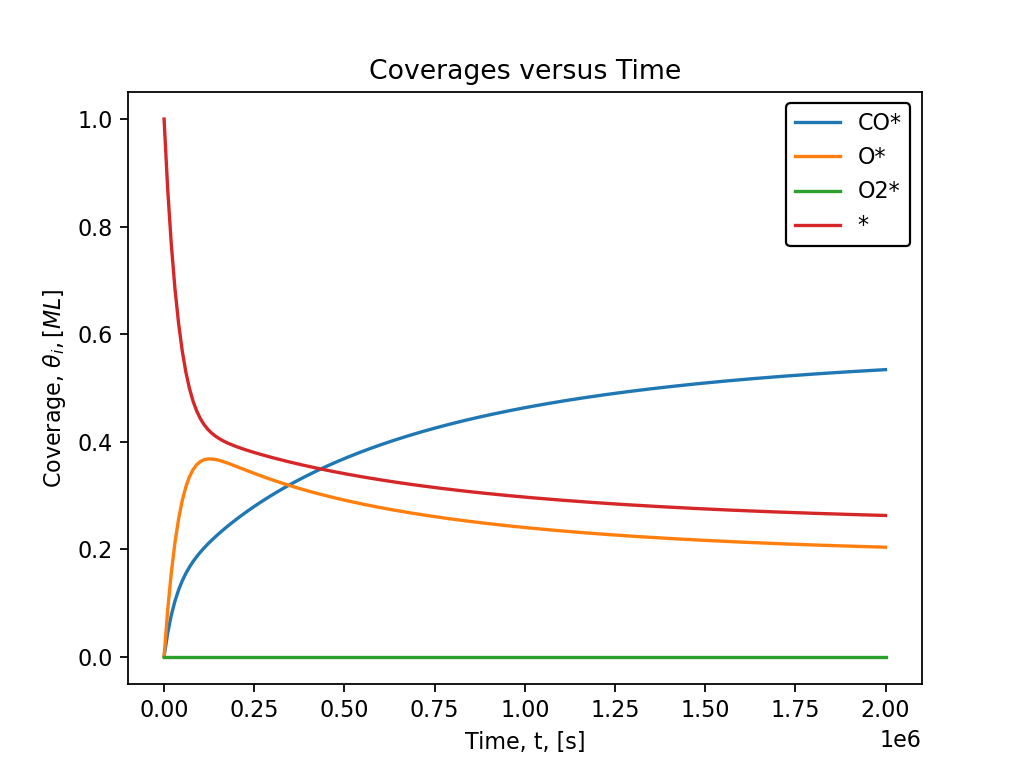

In [17]:
MKM.k = kval
tend = tend
MKM.set_limits_of_integration(Ti=0,Tf=tend)#Sets the reange of time used in integration
sol,solt= MKM.solve_coverage(plot=True,Tf_eval=linspace(0,tend,200)) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


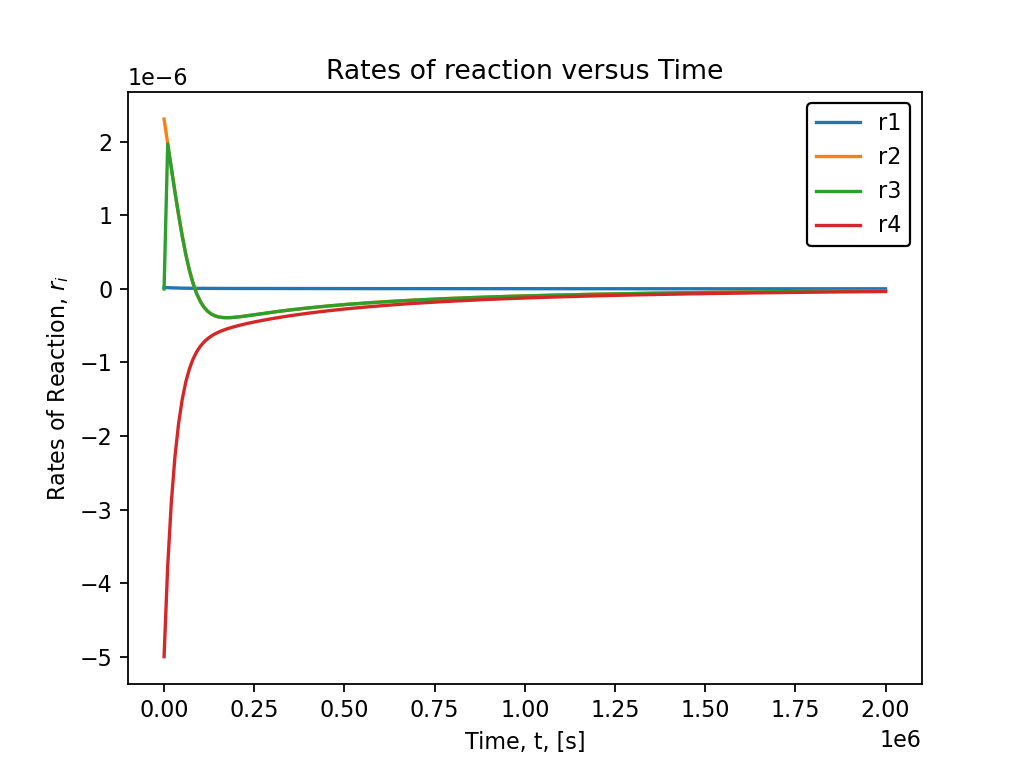

In [18]:
MKM.label='rates_r'
a = MKM.solve_rate_reaction(plot=True,Tf_eval=linspace(0,tend,200))

In [19]:
print(MKM.k)
time = solt

[2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02]


In [20]:
kvec = kval
k1f = kvec[0] ; k1r = kvec[1]
k2f = kvec[2] ; k2r = kvec[3]
k3f = kvec[4] ; k3r = kvec[5]
k4f = kvec[6] ; k4r = kvec[7]

Pvec = MKM.P 
P1 = Pvec[0]; P2 = Pvec[1] ; P3 = Pvec[2]

th1 = sol[:,0]; th2 = sol[:,1]; th3 = sol[:,2]; th4 = sol[:,3];

r1 = k1f*P1*th4 
rn1 = k1r*th1
r2 = k2f*P2*th4 
rn2 = k2r*th2
r3 = k3f*th2*(th4) 
rn3 = k3r*(th3**2)
r4 = k4f*th1*th3 
rn4 = k4r*P3*(th4**2)

<IPython.core.display.Javascript object>


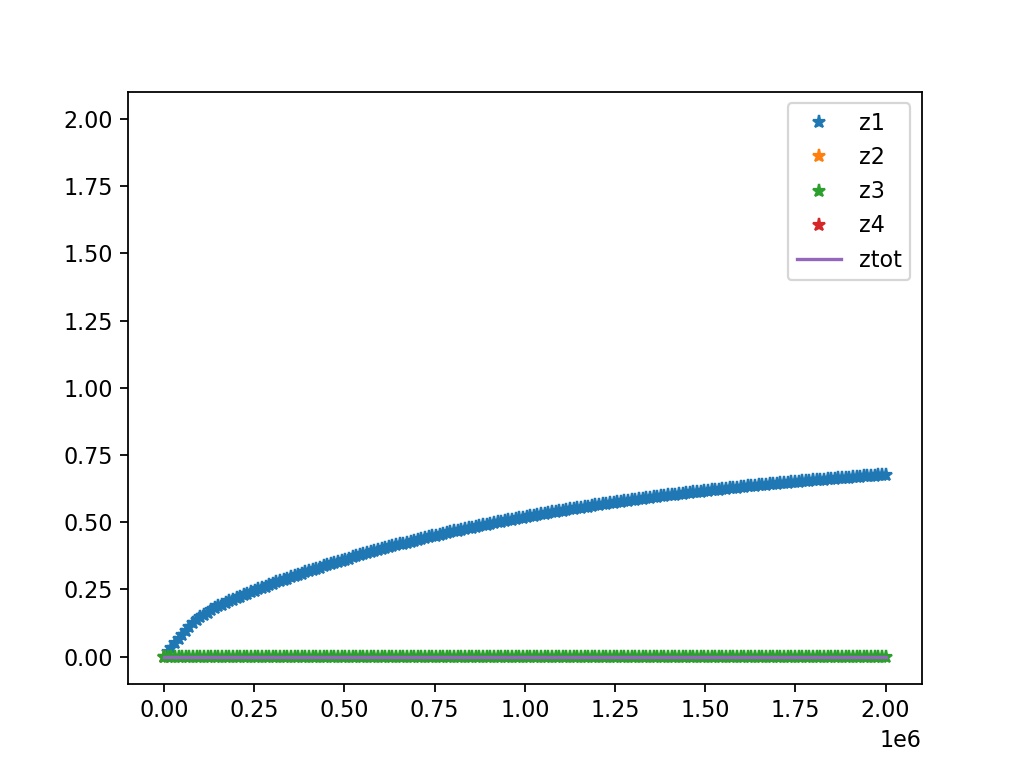

(-0.1, 2.1)

In [21]:
z1 = np.divide((rn1),np.where(r1 == 0, 1e-18, r1))
z2 = np.divide((rn2),np.where(r2 == 0, 1e-18, r2))
z3 = np.divide((rn3),np.where(r3 == 0, 1e-18, r3))
z4 = np.divide((rn4),np.where(r4 == 0, 1e-18, r4))
ztot = z1*z2*z3*z4
plt.figure()
plt.plot(time,z1,'*',label='z1')
plt.plot(time,z2,'*',label='z2')
plt.plot(time,z3,'*',label='z3')
plt.plot(time,z4,'*',label='z4')
plt.plot(time,ztot,'-',label='ztot')
plt.legend()
plt.ylim([-0.1,2.1])

In [22]:
# def get_X_RC_SS(p_inc=80,k_o_inp=[],rxn=-1):
    
#     #p_inc is the percent increase of rate const. #k_o_inp, is the inputed rate constants to allow for their initial values to be user defined, #rxn is the reaction producing the products being investigated : -1 indicates the last elementary step
#     if k_o_inp!=[]:
#         k_o = k_o_inp
#     else:
#         k_o = np.array(MKM.kextract()) #From Param file

#     Xrc = [] #Initializing the empty array of degrees of rate control
#     MKM.k = np.array(k_o)
#     rin = np.array(MKM.get_SS_rates_reaction())
#     # enablePrint()
#     # print('--initial SSrates')
#     # print(rin)
#     # print('\n')

#     if rxn>len(rin) or rxn<(-len(rin)):
#         raise Exception('An invalid rxn value has been entered')
#     else:
#         ro = rin[rxn] 

#     for i in np.arange(len(rin)):
# #         ro = rin[i]
#         n = 2*i
#         # print(i)
# #         print('before:')
# #         print(k_o)
#         kfwd = k_o[n]*(1+p_inc) #Multiplying the relevant forward rate const. by the change
#         krvs = k_o[n+1]*(1+p_inc) #Multiplying the relevant reverse rate const. by the change
#         indices = [n,n+1] #The relevant indices in the rate const. array corresponding to this change
#         repl = [kfwd,krvs] #The changed rate const.s corresponding to the indices
#         knew = np.array(k_o) #Re-initializing knew so it can only be changed for the specific elementary steps (i.e so that other rate constants remain unchanged)
#         for index, replacement in zip(indices, repl):
#             knew[index] = replacement
# #         print('after')
# #         print(knew)
#         MKM.k = np.array(knew)
#         rnew = np.array(MKM.get_SS_rates_reaction())
#         # print('\n Printing rnew')
#         # print(rnew)
#         Xrc.append((rnew[rxn]-ro)/(ro*p_inc))

#     MKM.k = np.array(k_o)
#     # blockPrint()

#     return Xrc

In [23]:
# val = get_X_RC_SS(k_o_inp=kfit)

In [24]:
# sum(val)